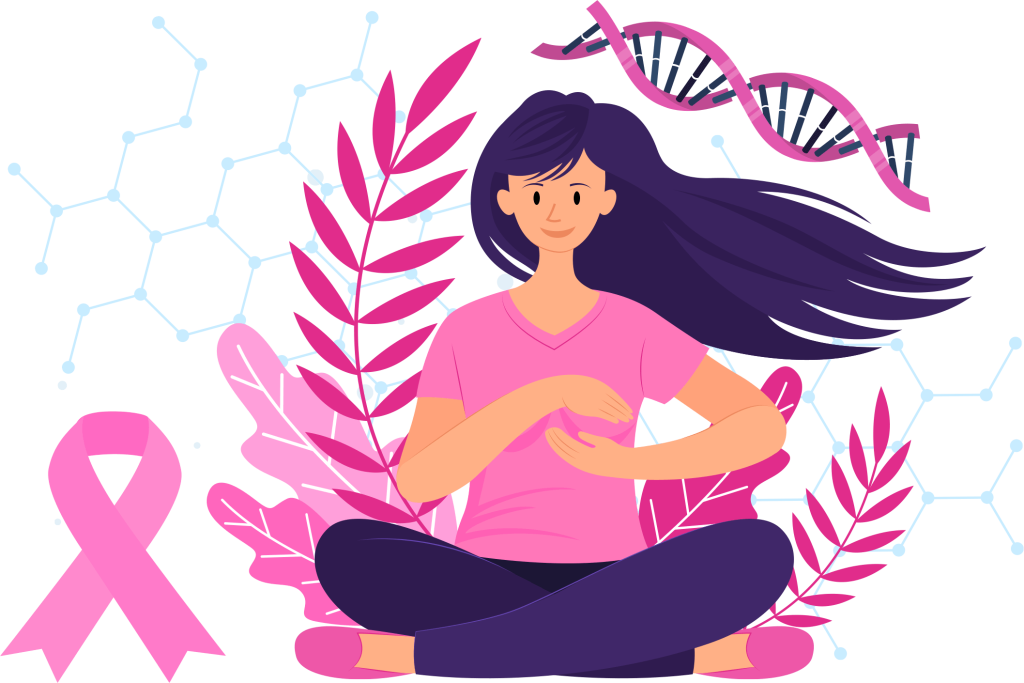

# **⬛Needed Libaries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt # plotting
import matplotlib.gridspec as gridspec # subplots
from sklearn.datasets import load_breast_cancer #load data
from sklearn.model_selection import train_test_split #for machine learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score, f1_score, precision_score, recall_score

colors=['#183a5a'	,'#efb758'	,'#c34129'	,'#e76666'	,'#f0d582','#e5a478','#616265','#5e4e4e']
plt.style.use("seaborn-ticks")
sns.set_style("ticks")

<ipython-input-1-6f169932837a>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")


# **⬛ Upload Data**

In [2]:
#https://drive.google.com/file/d/1xjZugAfL2ecBhGvW6UjQenTW5S0vJE9M/view?usp=sharing
!gdown --id 1xjZugAfL2ecBhGvW6UjQenTW5S0vJE9M

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xjZugAfL2ecBhGvW6UjQenTW5S0vJE9M
To: /content/Breast Cancer Wisconsin (Diagnostic) Data Set .csv
100% 125k/125k [00:00<00:00, 28.7MB/s]


In [32]:
df = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set .csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.diagnosis.unique()
# malignant tumor
# benign tumor

array(['M', 'B'], dtype=object)

In [5]:
print ("Total number of diagnosis are ", str(df.shape[0]), ", ", df.diagnosis.value_counts()['B'], "Benign and Malignant are",
       df.diagnosis.value_counts()['M'])

Total number of diagnosis are  569 ,  357 Benign and Malignant are 212


# **⬛Data Content**



- **ID number**
- **Diagnosis** (M = malignant, B = benign)
- **radius** (mean of distances from center to points on the perimeter)
- **texture** (standard deviation of gray-scale values)
perimeter
area
- **smoothness** (local variation in radius lengths)
- **compactness** (perimeter^2 / area - 1.0)
- **concavity** (severity of concave portions of the contour)
- **concave points** (number of concave portions of the contour)
symmetry
- **fractal dimension** ("coastline approximation" - 1)
-**The mean, standard error and "worst" or largest (mean of - the three largest values) **of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
- All **feature values** are recoded with four significant digits.
- **Missing attribute values:** none
- **Class distribution:** 357 benign, 212 malignan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

But Our Data Set Have Already Means

# **⬛Data Cleaning**

In [33]:
# drop the id column and the unnamed column (unnecessary columns)
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [34]:
# map the diagnosis column to 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

# **⬛Data Visualization**

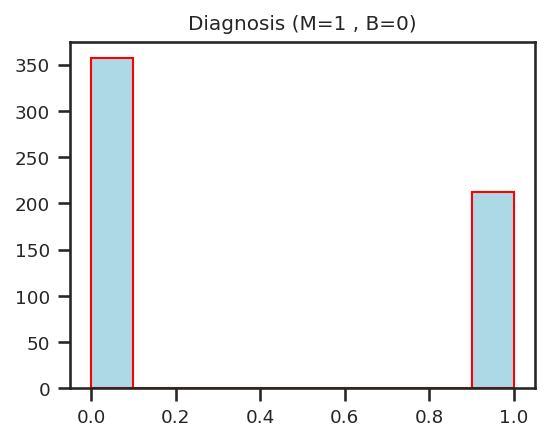

In [10]:
# plot the count of diagnosis
sns.set(font_scale=0.8)
sns.set_style("ticks")
plt.figure(figsize=(4,3),dpi=150)
plt.hist(df['diagnosis'],color = 'lightblue', ec="red")
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [11]:
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]


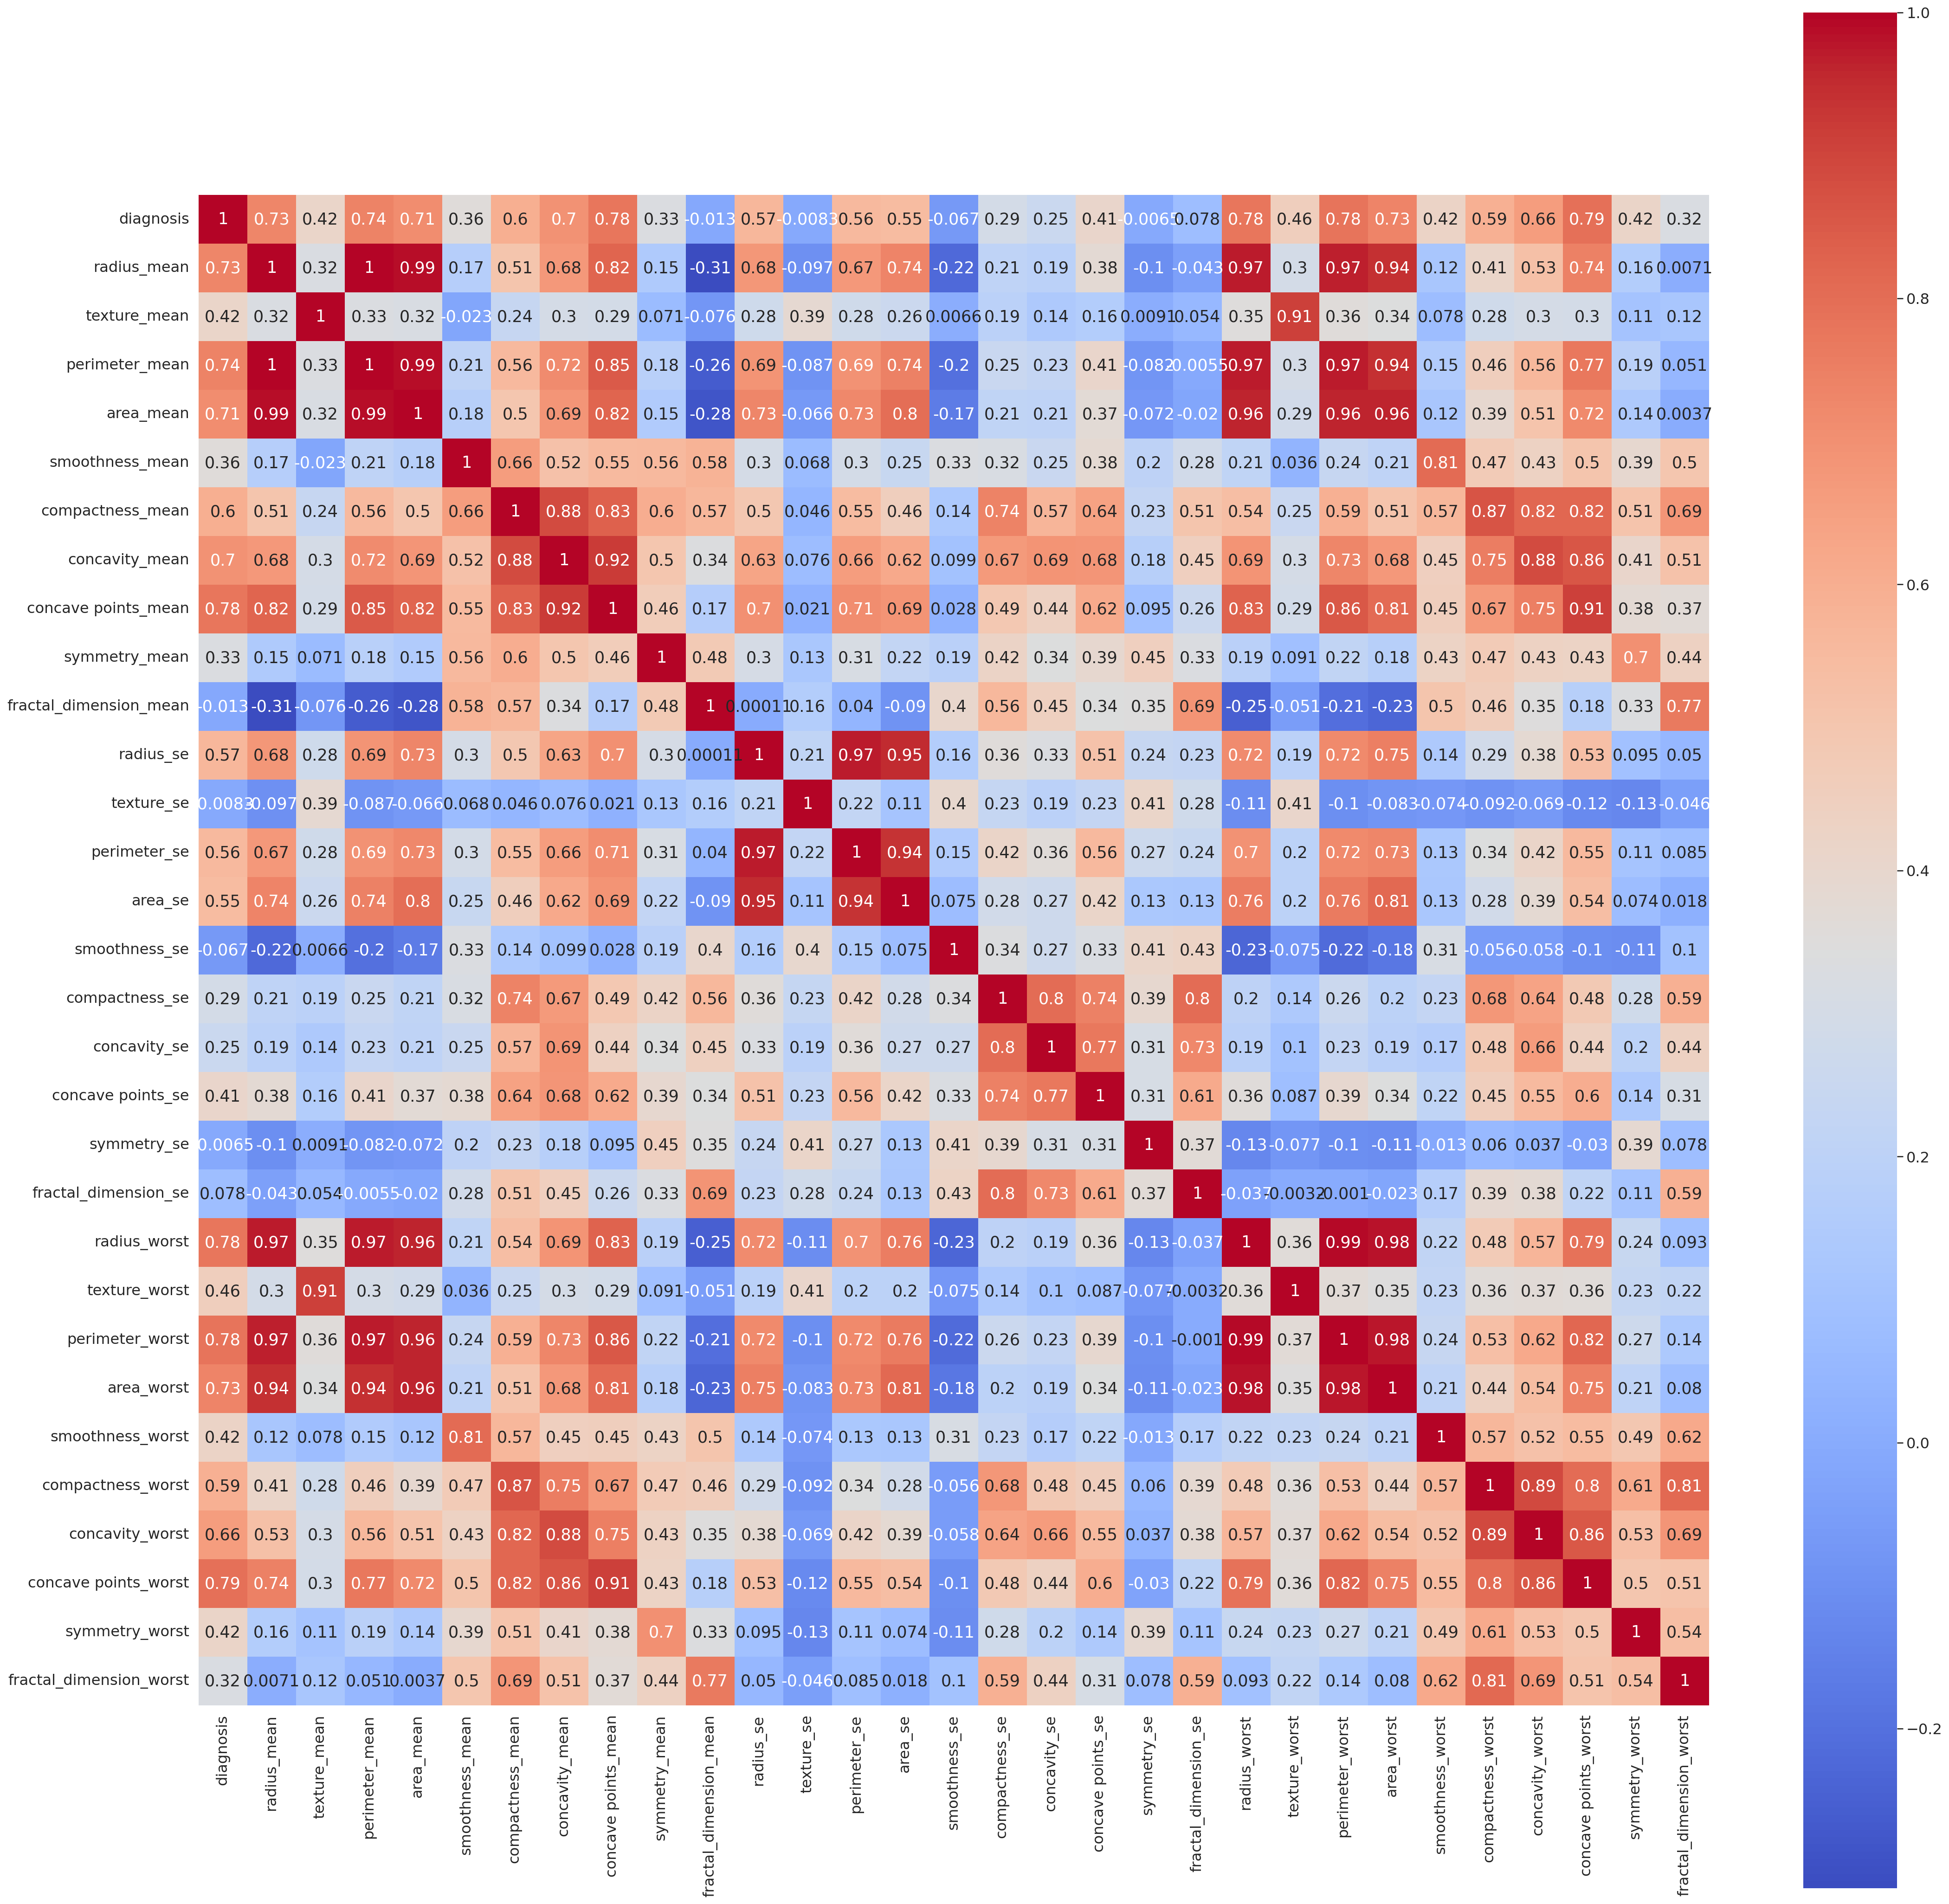

In [12]:
sns.set(font_scale=1.4)
plt.figure(figsize=(35,35),dpi=150)
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [13]:
# high corrlated features
# radius_mean with perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst
# radius_se with perimeter_se, area_se

# drop high correlated features
selected_df = df.drop(['perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','perimeter_se','area_se'],axis=1)

In [14]:
selected_df.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1        17.99         10.38          0.11840           0.27760   
1          1        20.57         17.77          0.08474           0.07864   
2          1        19.69         21.25          0.10960           0.15990   
3          1        11.42         20.38          0.14250           0.28390   
4          1        20.29         14.34          0.10030           0.13280   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius_se  ...  concave points_se  symmetry_se  fractal_dimension_se  \
0     1.0950  ...            0.01587      0.03003              0.006193   
1     0.5435  ...            0.01340      0.01389              0.003532   
2     0.7456  ...            0.02058      0.02250              0.004571   
3     0.4956  ...            0.01867      0.05963              0.009208   
4     0.7572  ...            0.01885      0.01756              0.005115   

   texture_worst  smoothness_worst  compactness_worst  concavity_worst  \
0          17.33            0.1622             0.6656           0.7119   
1          23.41            0.1238             0.1866           0.2416   
2          25.53            0.1444             0.4245           0.4504   
3          26.50            0.2098             0.8663           0.6869   
4          16.67            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 24 columns]

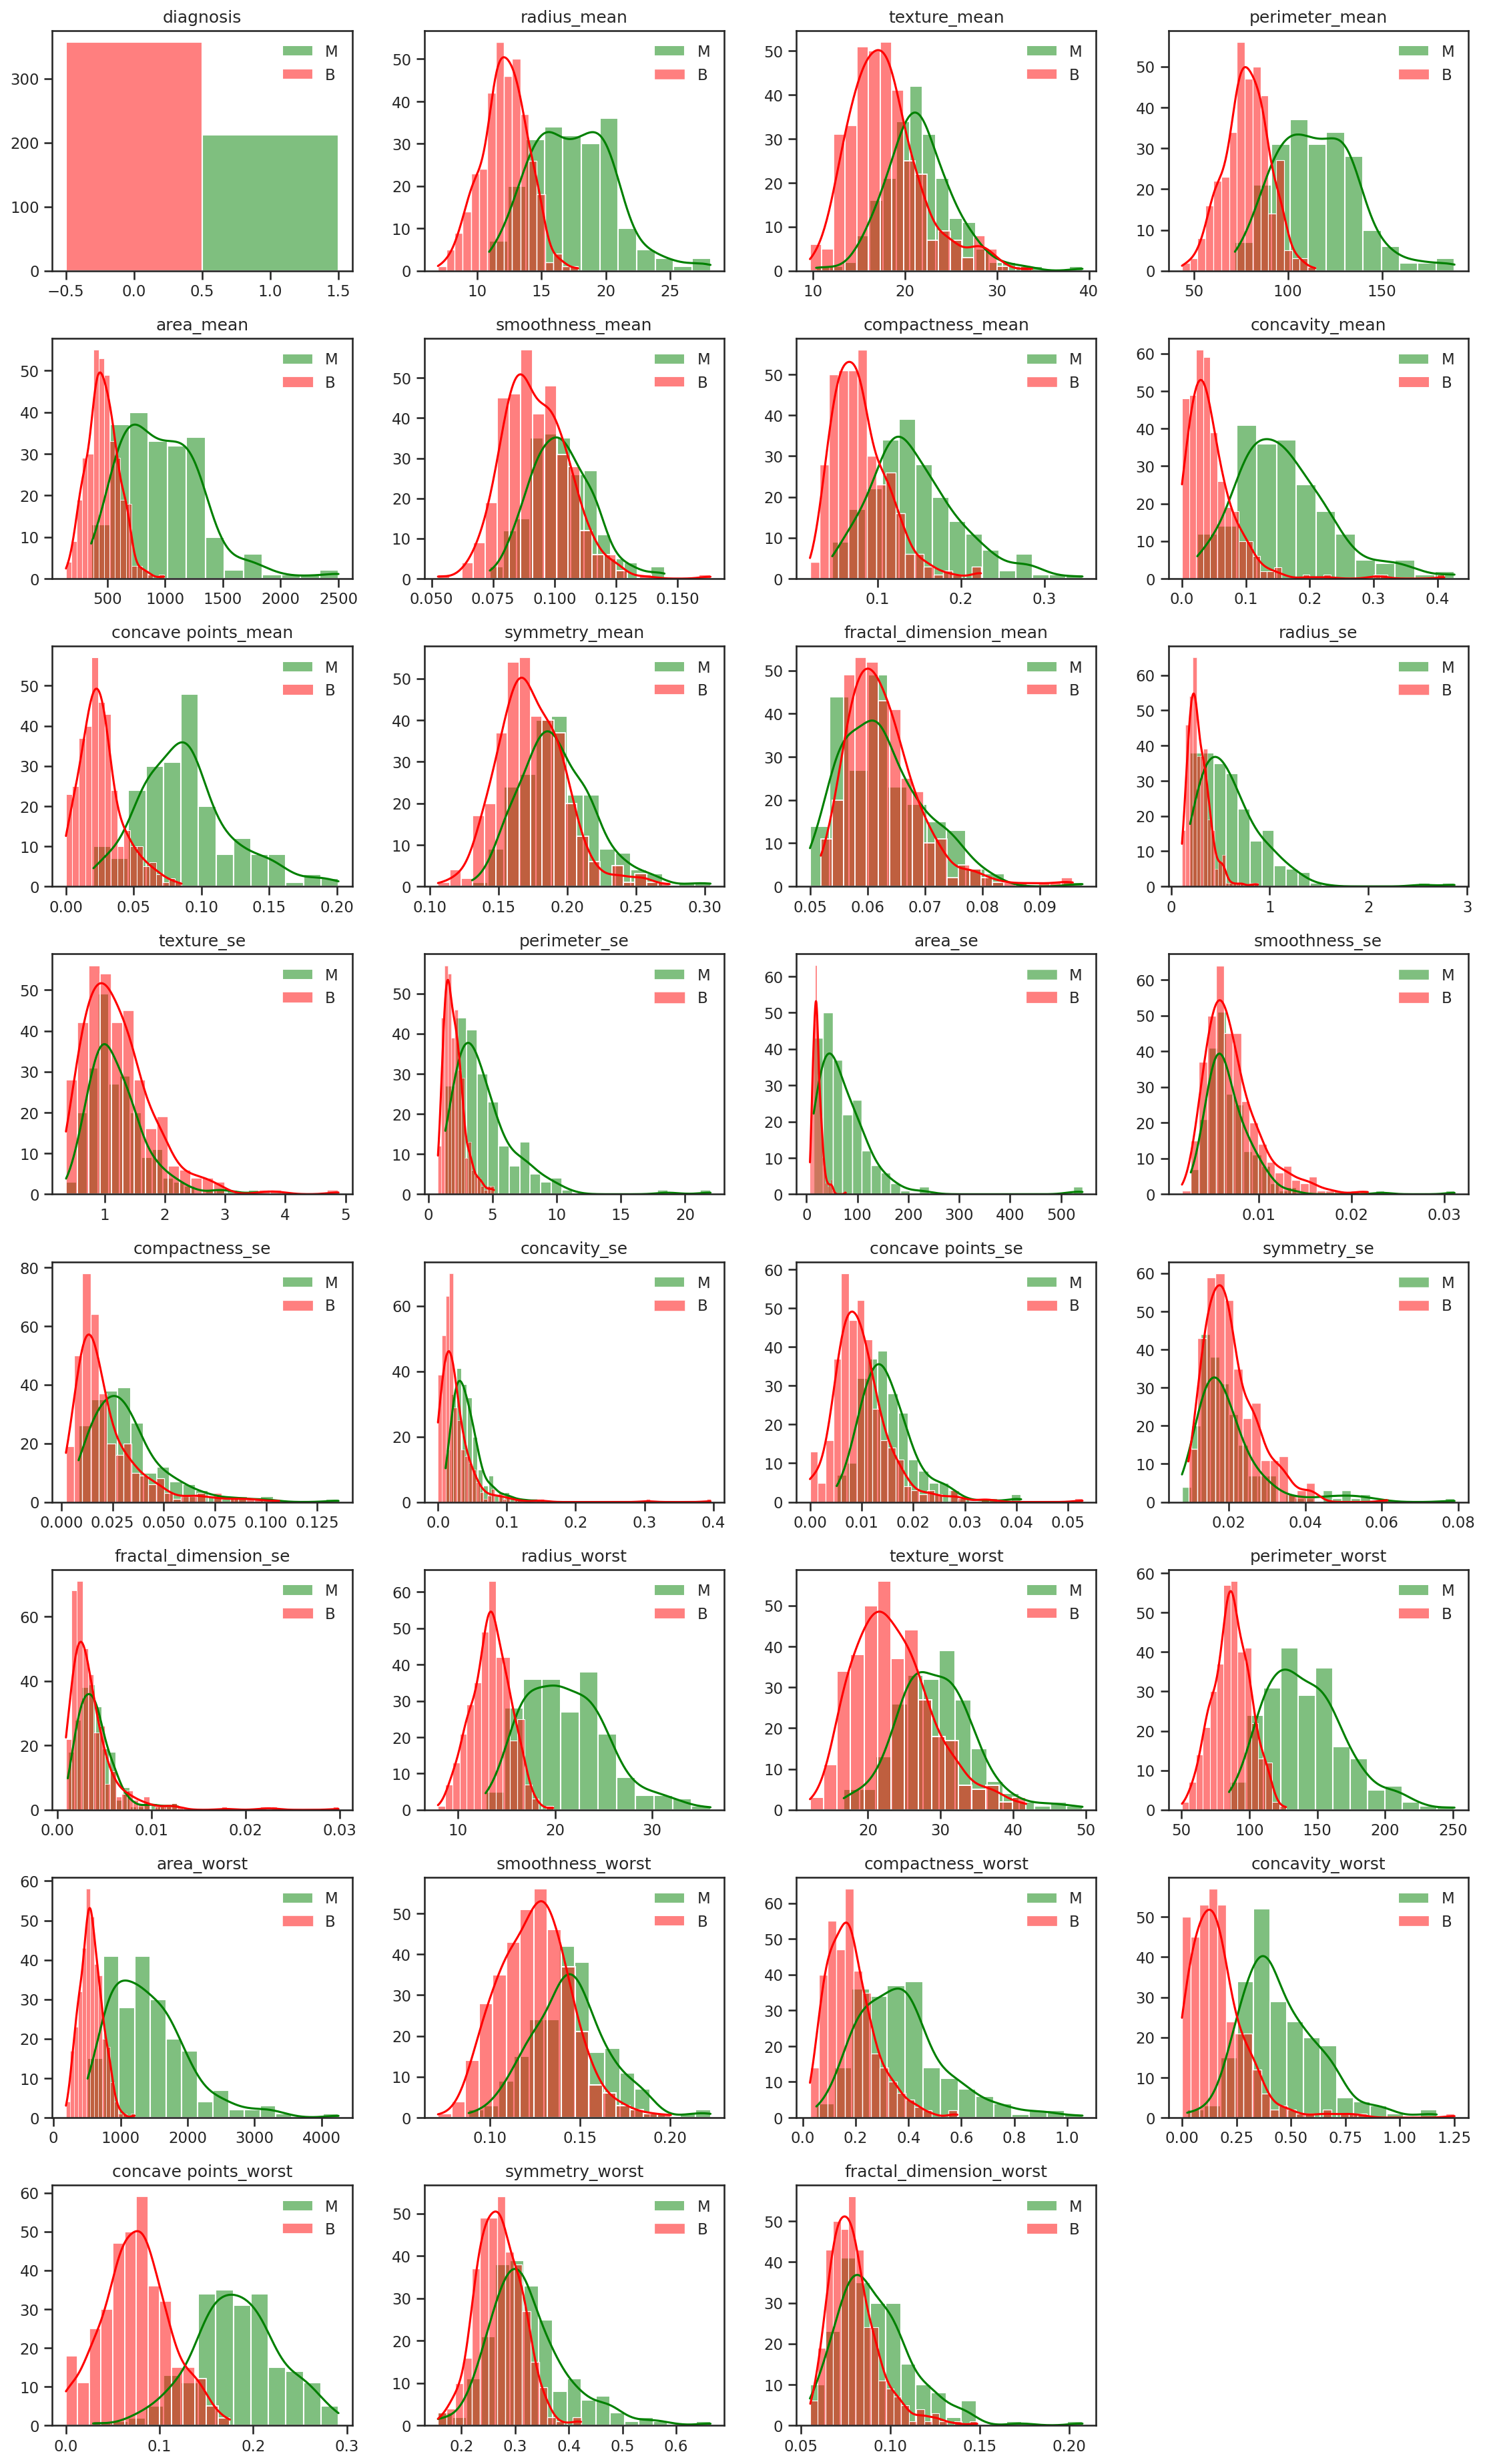

In [15]:
plt.figure(figsize=(15,25),dpi=150)
sns.set(font_scale=1)
sns.set_style("ticks")
for k,i in enumerate(df.columns):
  # print(i)
  ax=plt.subplot(8, 4, k+1)
  ax=sns.histplot(df[df['diagnosis']==1][i], color='green',kde=True, label='M')
  ax=sns.histplot(df[df['diagnosis']==0][i], color='red',kde=True, label='B')
  plt.legend(loc='upper right')
  plt.tight_layout()
  ax.set_title(str(i))
  ax.set_ylabel('')
  ax.set_xlabel('')
plt.show()

**Insights**

1. mean values of **cell radius**, **perimeter**, **area**, **compactness**, **concavity** and** concave points** can be used in classification of the cancer. **Larger values of these parameters tends to show a correlation with malignant tumors**.
2.mean values of **texture**, **smoothness**, **symmetry** or **fractual dimension** **does not show a particular preference of one diagnosis over the other**. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
selected_df = df.drop(['texture_se','fractal_dimension_mean','fractal_dimension_se','smoothness_se'],axis=1)

In [18]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

Our dataset already contains the mean values of all the columns

# **⬛ Traditional ML Prediction Model**

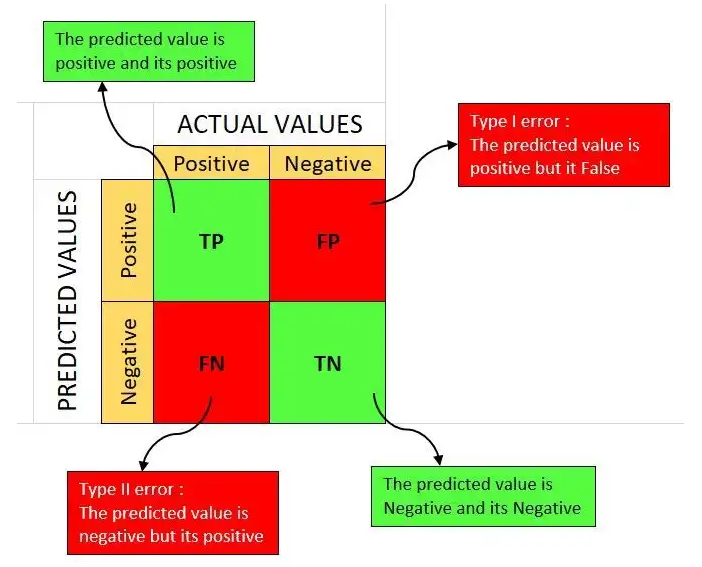

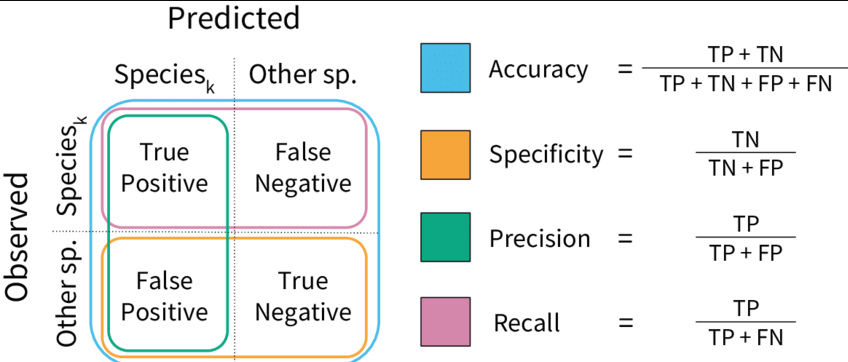

In [37]:
# split the data into x and y
X = selected_df.drop('diagnosis',axis=1) # features
y = selected_df['diagnosis'] # target variable
# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 😎 **K Nearest Neighbors (KNN) Model**

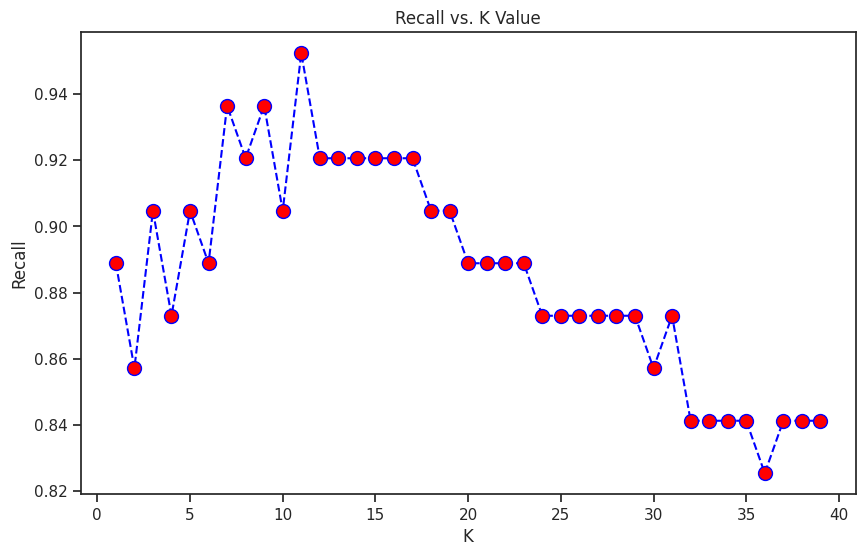

In [20]:
# hyperparameter tuning for knn model  in order to find the best k value on recall score
error_rates = []
for i in range(1,40):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train,y_train)
  y_pred_knn = knn_model.predict(X_test)
#   print("k=",i,"recall score=",recall_score(y_test,y_pred_knn))
  error_rates.append(recall_score(y_test,y_pred_knn))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
            markerfacecolor='red', markersize=10)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')
plt.show()



In [21]:
# k-nearest neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)


In [22]:
# print evaluation metrics
print("Accuracy of KNN model is: ", accuracy_score(y_test, y_pred_knn))
print("Precision of KNN model is: ", precision_score(y_test, y_pred_knn))
print("Recall of KNN model is: ", recall_score(y_test, y_pred_knn))
print("F1 score of KNN model is: ", f1_score(y_test, y_pred_knn))

# classification report
print(classification_report(y_test, y_pred_knn))


Accuracy of KNN model is:  0.9766081871345029
Precision of KNN model is:  0.9836065573770492
Recall of KNN model is:  0.9523809523809523
F1 score of KNN model is:  0.967741935483871
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.0, 'KNN Model with recall = 0.95')

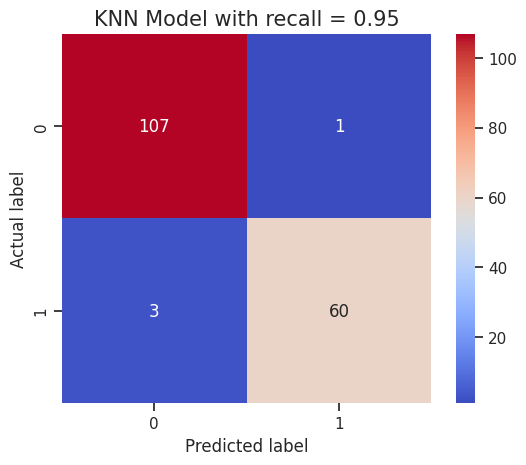

In [23]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# plot confusion matrix
# plt.figure(figsize=(5,5),dpi=150)
# print heatmap without floating point numbers
sns.heatmap(cm, annot=True, fmt="g",  square = True, cmap = 'coolwarm');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# round to two decimal points recall
recall_KNN = round(recall_score(y_test, y_pred_knn),2)

plt.title(f"KNN Model with recall = {recall_KNN}", size = 15)


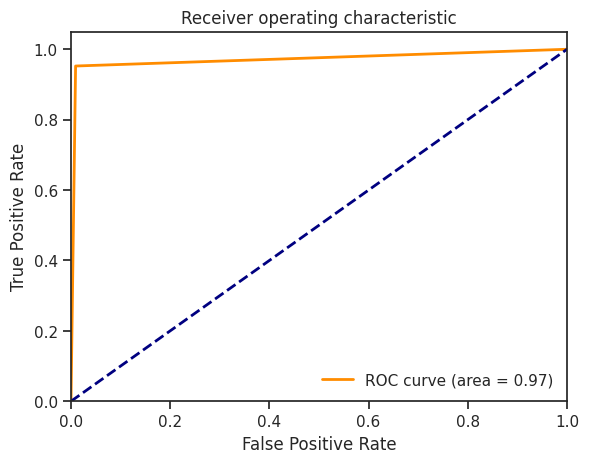

In [24]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(5,5),dpi=150)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## 🤓 **Naive Bayes Classifier**

In [25]:
# naive bayes classifier
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)
y_pred_NB = NB_model.predict(X_test)
NB_model.score(X_test,y_test)

0.9415204678362573

In [26]:
# print evaluation metrics
print("Accuracy of NB model is: ", accuracy_score(y_test, y_pred_NB))
print("Precision of NB model is: ", precision_score(y_test, y_pred_NB))
print("Recall of NB model is: ", recall_score(y_test, y_pred_NB))
print("F1 score of NB model is: ", f1_score(y_test, y_pred_NB))

# classification report
print(classification_report(y_test, y_pred_NB))


Accuracy of NB model is:  0.9415204678362573
Precision of NB model is:  0.9344262295081968
Recall of NB model is:  0.9047619047619048
F1 score of NB model is:  0.9193548387096774
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



Text(0.5, 1.0, 'Naive bayes Model with recall = 0.9')

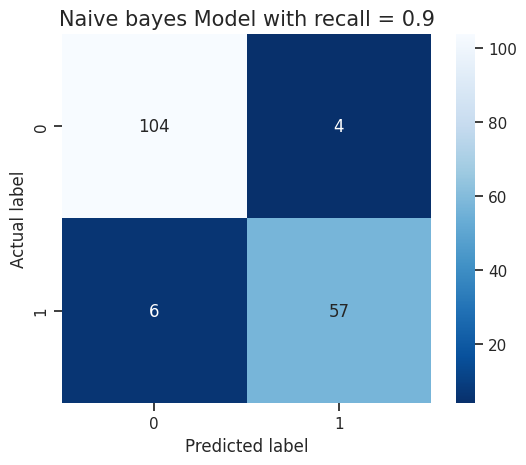

In [27]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_NB)

# plot confusion matrix
# plt.figure(figsize=(5,5),dpi=150)
# print heatmap without floating point numbers
sns.heatmap(cm, annot=True, fmt="g",  square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# round to two decimal points recall
recall_NB = round(recall_score(y_test, y_pred_NB),2)

plt.title(f"Naive bayes Model with recall = {recall_NB}", size = 15)


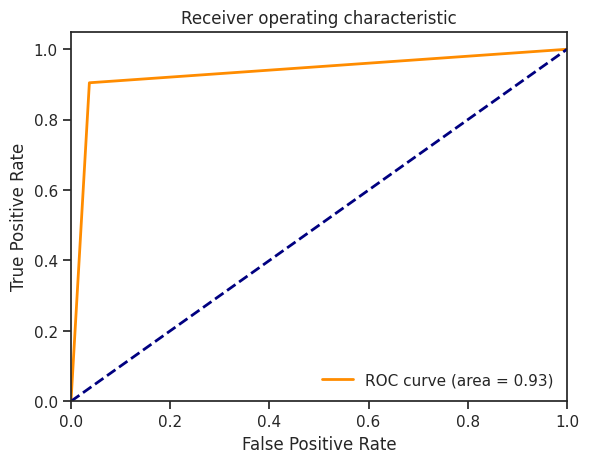

In [28]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_NB)
roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(5,5),dpi=150)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## ⚖ **Compare between the Two Models**

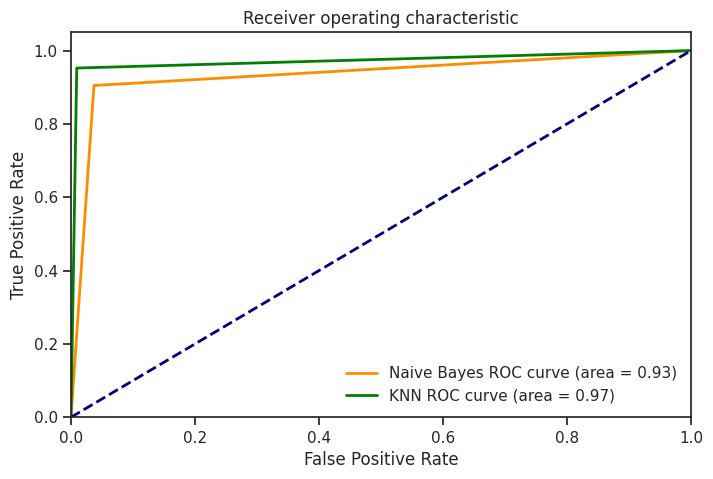

In [29]:
# plot roc curve with the two models
fpr_NB, tpr_NB, thresholds = roc_curve(y_test, y_pred_NB)
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc_NB = auc(fpr_NB, tpr_NB)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
plt.figure(figsize=(8,5),dpi=100)
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_NB)
plt.plot(fpr_KNN, tpr_KNN, color='green', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

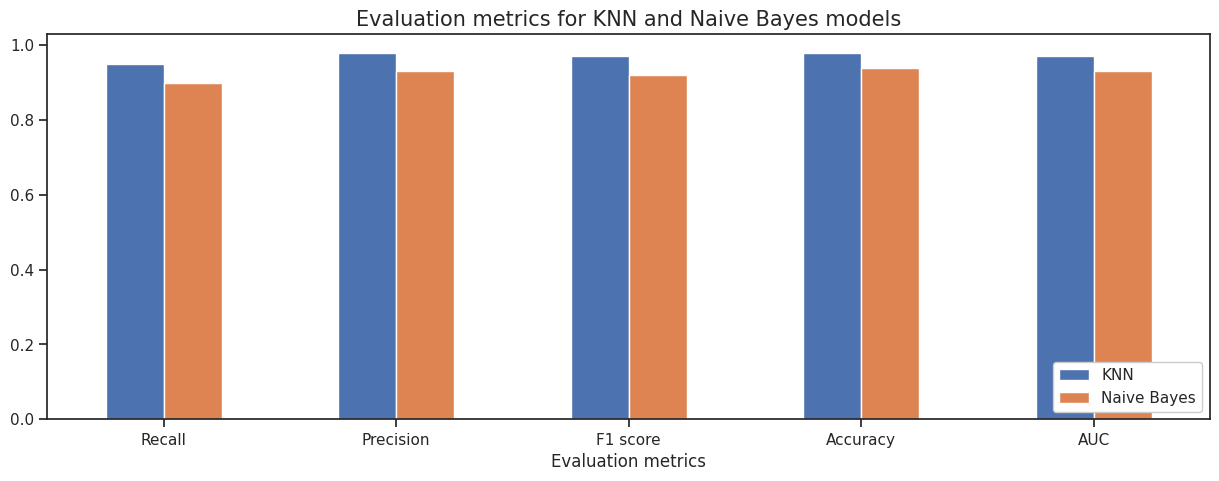

In [30]:
# plot bar chart for the evaluation metrics with the two models
recall_KNN = round(recall_score(y_test, y_pred_knn),2)
recall_NB = round(recall_score(y_test, y_pred_NB),2)
precision_KNN = round(precision_score(y_test, y_pred_knn),2)
precision_NB = round(precision_score(y_test, y_pred_NB),2)
f1_KNN = round(f1_score(y_test, y_pred_knn),2)
f1_NB = round(f1_score(y_test, y_pred_NB),2)
accuracy_KNN = round(accuracy_score(y_test, y_pred_knn),2)
accuracy_NB = round(accuracy_score(y_test, y_pred_NB),2)
Auc_KNN = round(roc_auc_KNN,2)
Auc_NB = round(roc_auc_NB,2)

# add the values to dataframe
df_results = pd.DataFrame({'KNN':[recall_KNN, precision_KNN, f1_KNN, accuracy_KNN, Auc_KNN],
                            'Naive Bayes':[recall_NB, precision_NB, f1_NB, accuracy_NB, Auc_NB]},
                            index=['Recall', 'Precision', 'F1 score', 'Accuracy', 'AUC'])
# plot bar chart
df_results

# plot bar chart for the evaluation metrics with the two models side by side
# plt.figure(figsize=(5,5),dpi=150)
df_results.plot(kind='bar', figsize=(15,5), rot=0)

plt.xlabel('Evaluation metrics')
plt.title('Evaluation metrics for KNN and Naive Bayes models', size = 15)
# add background to legend and make it on bottom right
plt.legend(frameon=True, facecolor='white', framealpha=1, loc='lower right')
plt.show()


# 🖇   Classification using DNN

In [35]:
#show the categorical data columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')


In [39]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

## 1-layer NN

In [55]:
def l1neuralNetwork():
    # Initialize the ANN
    classifier = Sequential()

    # Adding the single hidden layer with ReLU activation
    # Changed input_dim to 26 to match the actual input shape
    classifier.add(Dense(units=2, activation='relu', input_dim=26, kernel_initializer='uniform'))

    # Adding the output layer (for binary classification, we use 'sigmoid')
    classifier.add(Dense(units=1, activation='sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return classifier

## 3-layer NN

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def l3neuralNetwork():
    # Initialize the model
    classifier = Sequential()

    #first hidden layer
    classifier.add(Dense(units=64, activation='relu', input_dim=26, kernel_initializer='uniform'))
    classifier.add(Dropout(0.2))

    #second hidden layer
    classifier.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))

    #output layer
    classifier.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return classifier


## 5-layer NN

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def l5neuralNetwork():
    # Initialize the ANN
    classifier = Sequential()

    # Input layer and first hidden layer
    classifier.add(Dense(units=128, activation='relu', input_dim=26, kernel_initializer='uniform'))

    # Second hidden layer
    classifier.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))

    # Third hidden layer
    classifier.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))

    # Fourth hidden layer
    classifier.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))

    # Output layer (for binary classification)
    classifier.add(Dense(units=1, activation='sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return classifier


##  Train the Models

In [ ]:
# Train and evaluate the 1-layer network
model_1 = l1neuralNetwork()
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test)

In [ ]:
# Train and evaluate the 3-layer network
model_3 = l3neuralNetwork()
history_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test)



In [67]:
# Train and evaluate the 5-layer network
model_5 = l5neuralNetwork()
history_5 = model_5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, y_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6063 - loss: 0.6895 - val_accuracy: 0.8480 - val_loss: 0.6640
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8587 - loss: 0.6375 - val_accuracy: 0.9591 - val_loss: 0.4626
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9642 - loss: 0.3864 - val_accuracy: 0.9591 - val_loss: 0.1474
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9447 - loss: 0.1781 - val_accuracy: 0.9766 - val_loss: 0.0677
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9643 - loss: 0.1171 - val_accuracy: 0.9766 - val_loss: 0.0530
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9809 - loss: 0.0833 - val_accuracy: 0.9883 - val_loss: 0.0545
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9735 - loss: 0.0878 - val_accuracy: 0.9942 - val_loss: 0.0457
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9901 - loss: 0.0508 - val_accuracy: 0.9942 - val_loss: 0.0441
Ep

# Evaluate the ANN Models

In [68]:
# Print the accuracies
print(f"1-Layer Test Accuracy: {test_accuracy_1}")
print(f"3-Layer Test Accuracy: {test_accuracy_3}")
print(f"5-Layer Test Accuracy: {test_accuracy_5}")

1-Layer Test Accuracy: 0.9766082167625427
3-Layer Test Accuracy: 0.9941520690917969
5-Layer Test Accuracy: 0.988304078578949


In [69]:


# Predict using the DNN models
y_pred_dnn_1 = (model_1.predict(X_test) > 0.5).astype("int32")
y_pred_dnn_3 = (model_3.predict(X_test) > 0.5).astype("int32")
y_pred_dnn_5 = (model_5.predict(X_test) > 0.5).astype("int32")

# Print confusion matrix reports for the DNN models
print("Confusion Matrix and Classification Report for 1-Layer DNN:")
print(confusion_matrix(y_test, y_pred_dnn_1))
print(classification_report(y_test, y_pred_dnn_1))

print("\nConfusion Matrix and Classification Report for 3-Layer DNN:")
print(confusion_matrix(y_test, y_pred_dnn_3))
print(classification_report(y_test, y_pred_dnn_3))

print("\nConfusion Matrix and Classification Report for 5-Layer DNN:")
print(confusion_matrix(y_test, y_pred_dnn_5))
print(classification_report(y_test, y_pred_dnn_5))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Confusion Matrix and Classification Report for 1-Layer DNN:
[[105   3]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Confusion Matrix and Classification Report for 3-Layer DNN:
[[108   0]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


Confusion Matrix and Classification Report for 5-Layer DNN:
[[107   1]
 [  1  62]]
              precision    recall  f1-score   support

  

## 📊 Visualizing Training Progress:

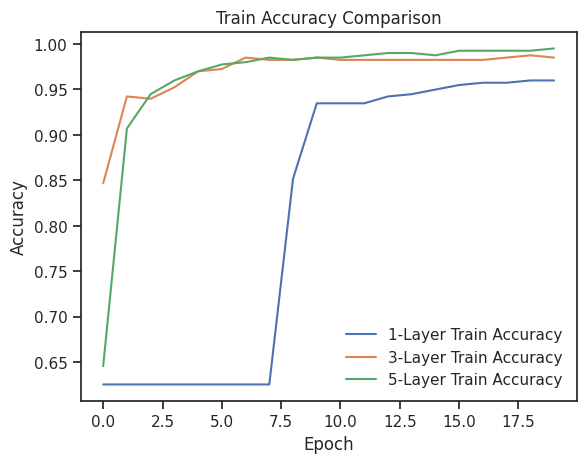

In [70]:
import matplotlib.pyplot as plt

# Plot training accuracy comparison
plt.plot(history_1.history['accuracy'], label='1-Layer Train Accuracy')
plt.plot(history_3.history['accuracy'], label='3-Layer Train Accuracy')
plt.plot(history_5.history['accuracy'], label='5-Layer Train Accuracy')
plt.title('Train Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()





## **Compare the best performances of (KNN and 3-layer NN)**

In [72]:
# Create a DataFrame to store the results for comparison
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'KNN': [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn),
            recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn),
            roc_auc_score(y_test, y_pred_knn)],
    'Model 3 (3-layer NN)': [accuracy_score(y_test, y_pred_dnn_3), precision_score(y_test, y_pred_dnn_3),
                             recall_score(y_test, y_pred_dnn_3), f1_score(y_test, y_pred_dnn_3),
                             roc_auc_score(y_test, y_pred_dnn_3)]
})




In [73]:
# Display the comparison DataFrame
print(comparison_df)


      Metric       KNN  Model 3 (3-layer NN)
0   Accuracy  0.976608              0.994152
1  Precision  0.983607              1.000000
2     Recall  0.952381              0.984127
3   F1-Score  0.967742              0.992000
4        AUC  0.971561              0.992063


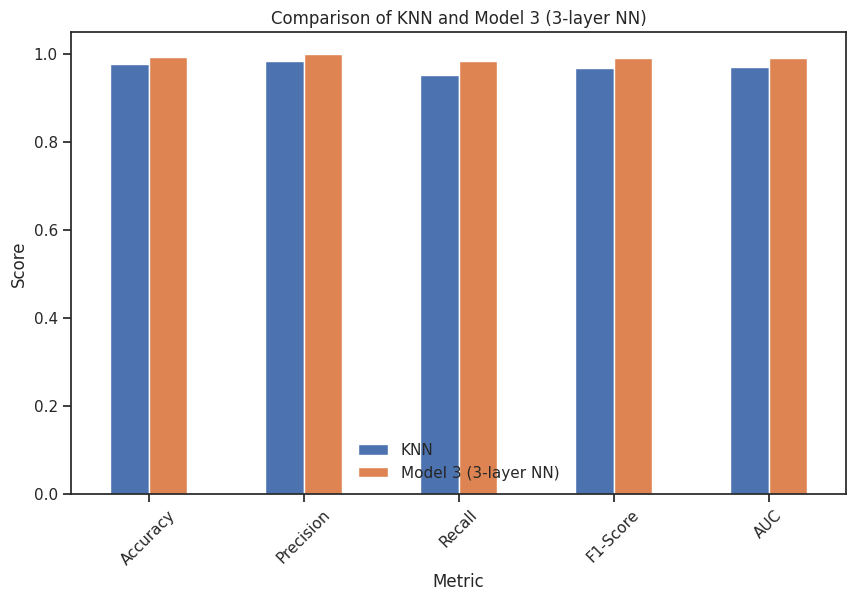

In [74]:


# Visualize the comparison using bar plots
comparison_df.plot(x='Metric', kind='bar', figsize=(10, 6))
plt.title('Comparison of KNN and Model 3 (3-layer NN)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()
